# Image to Undistorted Binary Warped

## Camera Clibration

In [1]:
from camera_calibration import CameraCalibration

camera = CameraCalibration()
camera.calibrate_using_images()

Processing all files in folder:  ./camera_cal/calibration*.jpg
Chessboard cannot find corneres for: ./camera_cal\calibration1.jpg
Chessboard cannot find corneres for: ./camera_cal\calibration4.jpg
Chessboard cannot find corneres for: ./camera_cal\calibration5.jpg
Calibration done
mtx and dist arrays have been saved to: camera_calib.p


## Calibration Test Using Chessboard

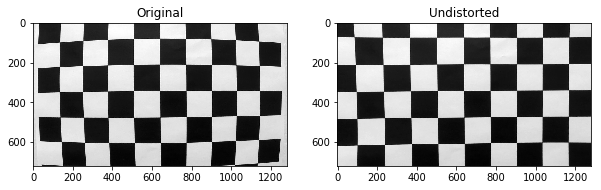

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


camera = CameraCalibration()
camera.load_calibration()

filename = './camera_cal/calibration1.jpg'

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

undistort_img = camera.undistort(img)

f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(undistort_img, cmap='gray')
ax2.set_title('Undistorted')

plt.show()


## File to Test

In [3]:
testfile = './project_video-frames/0000.jpg'
#testfile = './project_video-frames/1037.jpg'

def load_test_image():
    img = cv2.imread(testfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

## Test Undistort on Actual Frame

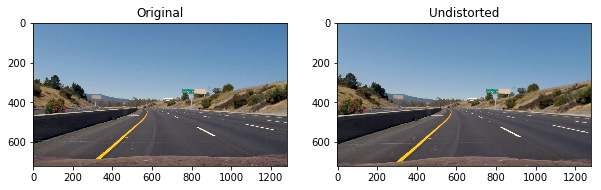

In [4]:
camera = CameraCalibration()
camera.load_calibration()

img = load_test_image()
undistort_img = camera.undistort(img)

f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(undistort_img, cmap='gray')
ax2.set_title('Undistorted')

plt.show()

## Perspective Transform

Src: [[  585.   457.]
 [  701.   457.]
 [ 1100.   710.]
 [  230.   710.]]
Dst: [[  230.     0.]
 [ 1100.     0.]
 [ 1100.   720.]
 [  230.   720.]]


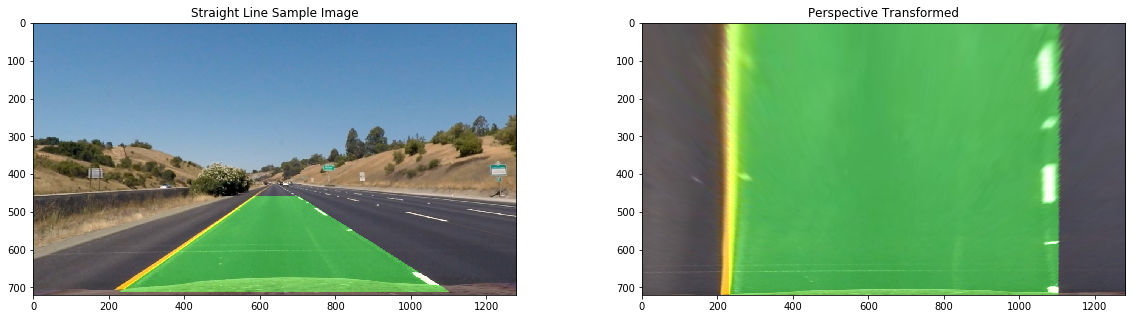

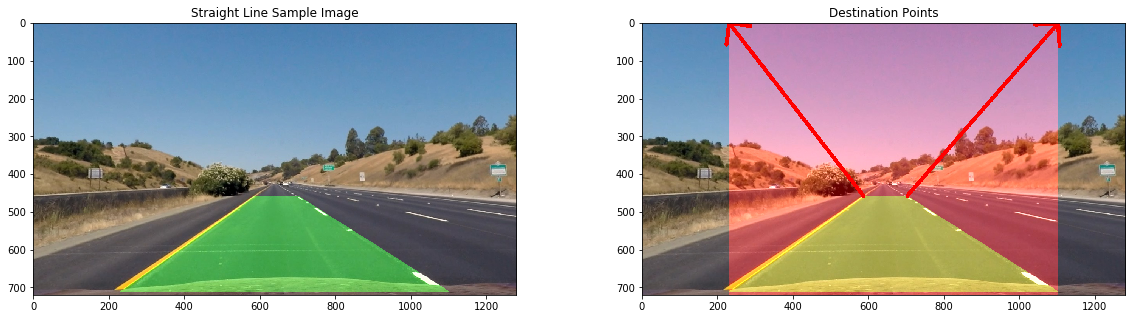

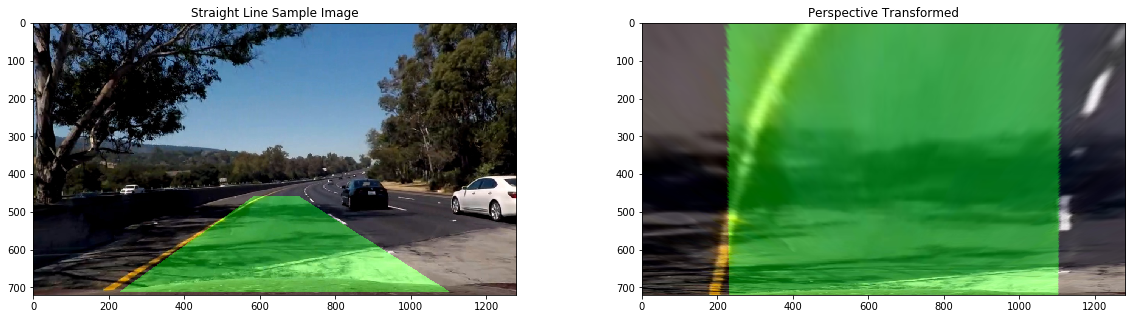

In [5]:
import matplotlib.patches as patches
from lane_detection import LaneDetection

lane_algo = LaneDetection()
src = lane_algo.src
dst = lane_algo.dst
img_size = undistort_img.shape[:2][::-1]

print('Src:', lane_algo.src)
print('Dst:', lane_algo.dst)


filename = './test_images/straight_lines1.jpg'

def show_perspective(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistort_img = lane_algo.undistort(img)

    # draw polygon on the original image so that we can see
    # how it is transformed into afterwards

    blank_img = np.zeros_like(undistort_img)
    cv2.fillPoly(blank_img, np.int_([src]), (0, 255, 0))
    img_with_polygon = cv2.addWeighted(undistort_img, 1, blank_img, 0.4, 0)

    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img_with_polygon, M, img_size)

    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

    ax1.imshow(img_with_polygon)
    ax1.set_title('Straight Line Sample Image')
    ax2.imshow(warped)
    ax2.set_title('Perspective Transformed')

    plt.show()
    return img_with_polygon

img_with_polygon = show_perspective(filename)
arrow_img = np.copy(img_with_polygon)

# draw arrow heads to show where the points are being moved
start = src[0][0], src[0][1]
end = dst[0][0], dst[0][1]
cv2.arrowedLine(arrow_img, start, end, (255, 0, 0), 10)

start = src[1][0], src[1][1]
end = dst[1][0], dst[1][1]
cv2.arrowedLine(arrow_img, start, end, (255, 0, 0), 10)

blank_img = np.zeros_like(undistort_img)
cv2.fillPoly(blank_img, np.int_([dst]), (255, 0, 0))
arrow_img = cv2.addWeighted(arrow_img, 1, blank_img, 0.4, 0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.imshow(img_with_polygon)
ax1.set_title('Straight Line Sample Image')
ax2.imshow(arrow_img)
ax2.set_title('Destination Points')

plt.show()

img_with_polygon = show_perspective('./project_video-frames/1038.jpg')

# Color Spaces

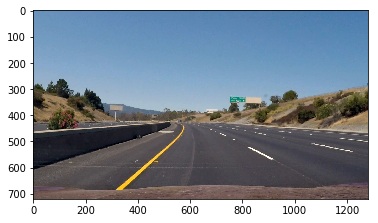

['cv2.COLOR_RGB2BGR', 'cv2.COLOR_RGB2BGR555', 'cv2.COLOR_RGB2BGR565', 'cv2.COLOR_RGB2BGRA', 'cv2.COLOR_RGB2GRAY', 'cv2.COLOR_RGB2HLS', 'cv2.COLOR_RGB2HSV', 'cv2.COLOR_RGB2LAB', 'cv2.COLOR_RGB2LUV', 'cv2.COLOR_RGB2Lab', 'cv2.COLOR_RGB2Luv', 'cv2.COLOR_RGB2RGBA', 'cv2.COLOR_RGB2XYZ', 'cv2.COLOR_RGB2YCR_CB', 'cv2.COLOR_RGB2YCrCb', 'cv2.COLOR_RGB2YUV', 'cv2.COLOR_RGB2YUV_I420', 'cv2.COLOR_RGB2YUV_IYUV', 'cv2.COLOR_RGB2YUV_YV12']


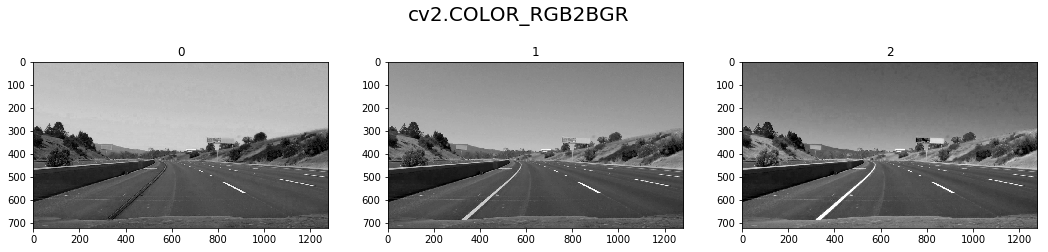

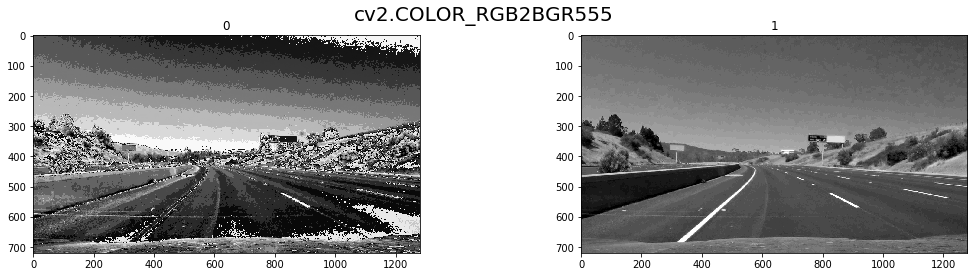

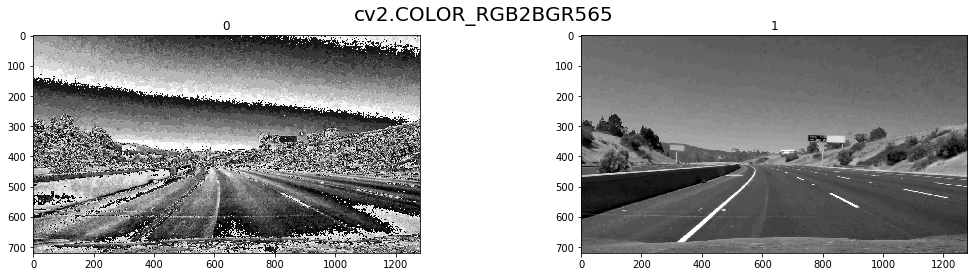

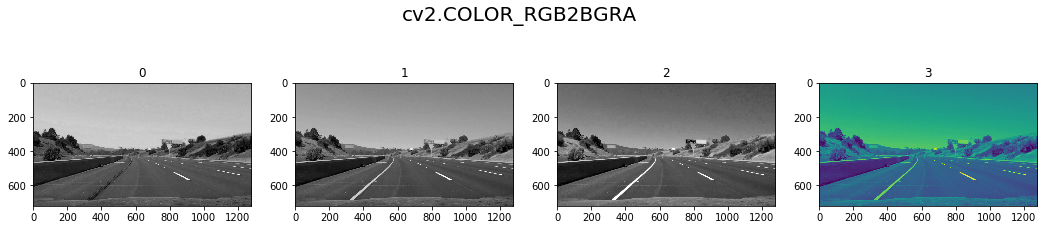

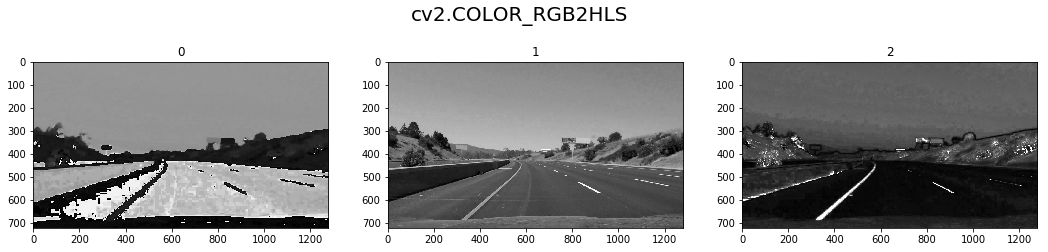

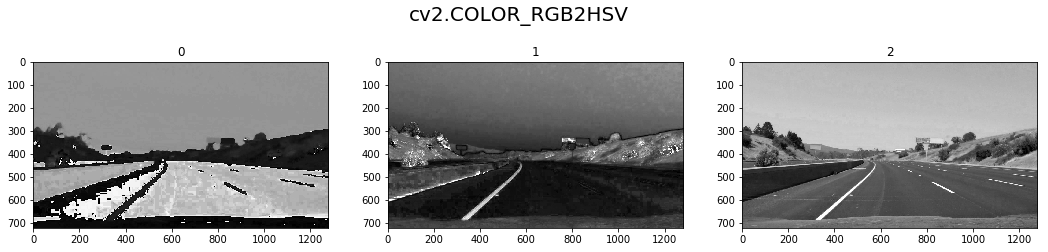

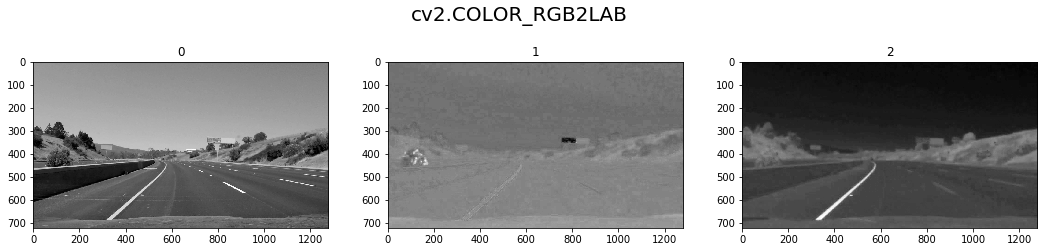

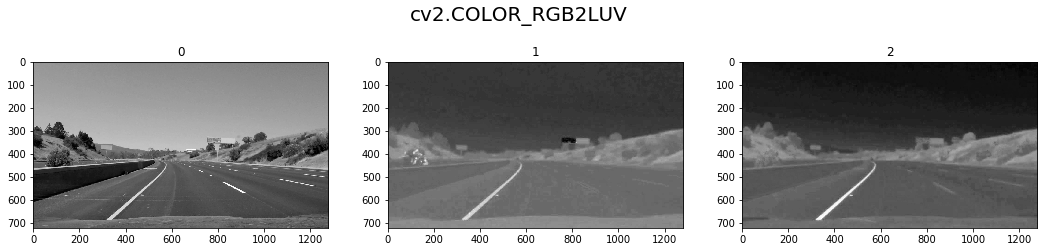

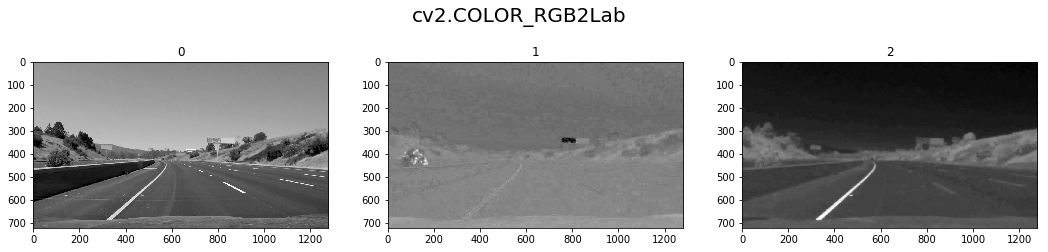

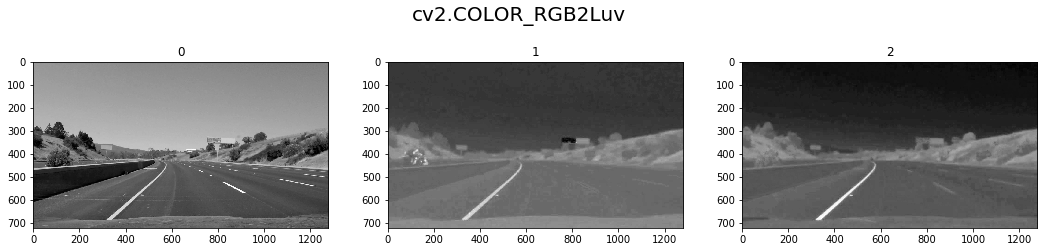

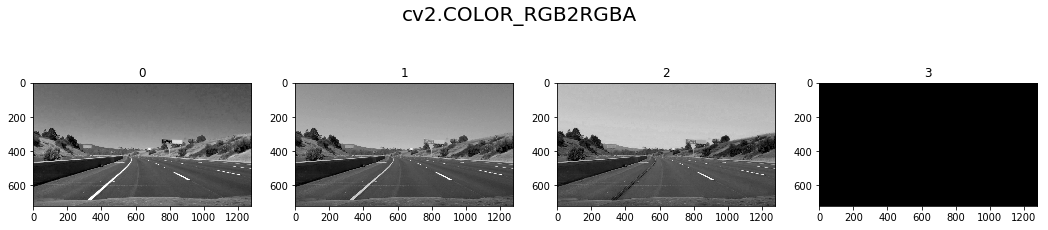

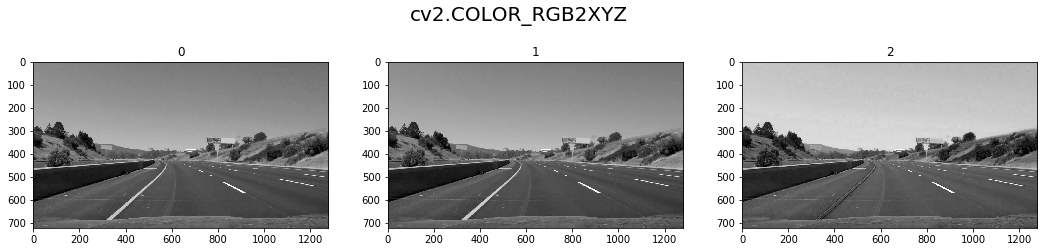

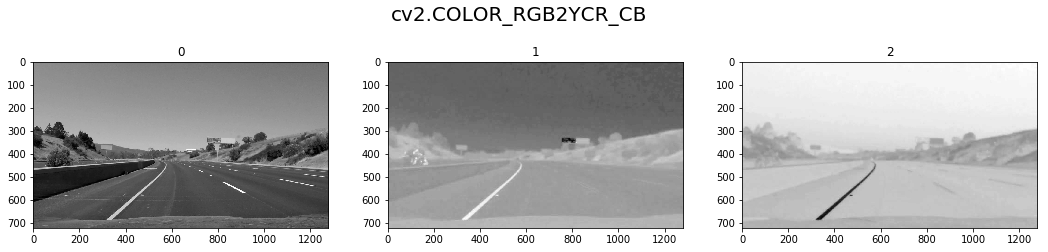

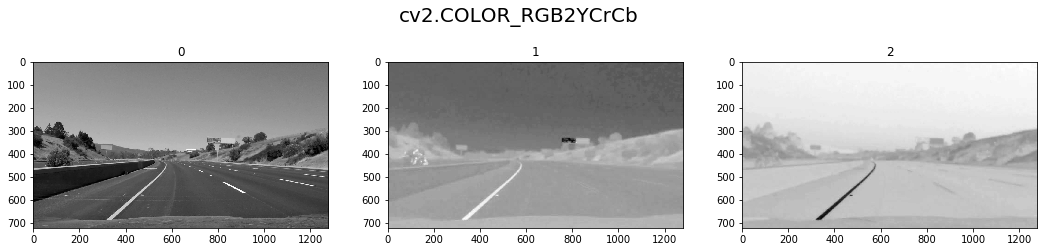

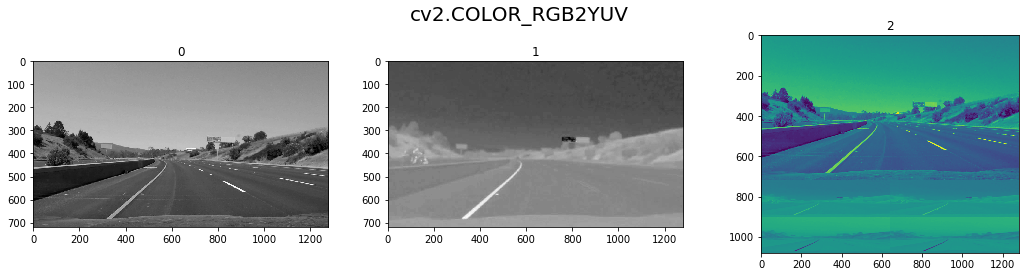

In [6]:
img = load_test_image()
#img = load_warped_image(img)

def print_channels(title, channels):

    if len(channels.shape) > 2:
        n_channels = channels.shape[2]
        f, axis = plt.subplots(1, n_channels, figsize=(18,4))
        f.suptitle(title, fontsize=20)
        
        for i in range(n_channels):
            channel = channels[:,:,i]
            axis[i].imshow(channel, cmap='gray')
            axis[i].set_title(i)
    else:
        plt.imshow(channels)

def show_all_spaces(img):
    all_spaces = ['cv2.' + i for i in dir(cv2) if i.startswith('COLOR_RGB2') and not i.endswith('_FULL')]
    print(all_spaces)

    for space in all_spaces:
        channels = cv2.cvtColor(img, eval(space)).astype(np.float)
        print_channels(space, channels)

plt.imshow(img)
plt.show()

show_all_spaces(img)
plt.show()

## Color Space Used

L, B and S color space is being used in the code

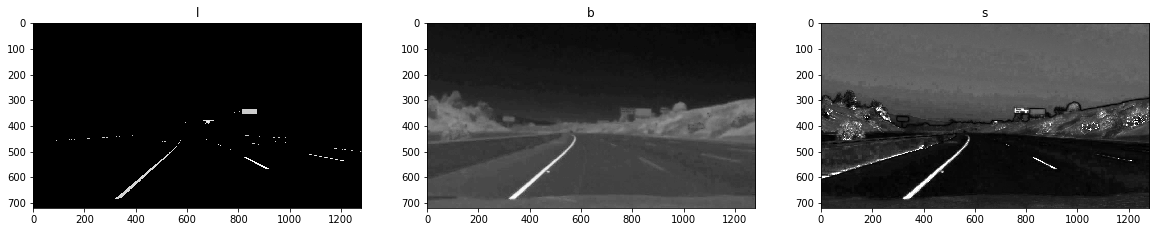

In [7]:
from edge_detection import EdgeDetection

img = load_test_image()
ed = EdgeDetection(img)

l = ed.l
b = ed.b
s = ed.s

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(l, cmap='gray')
ax1.set_title('l')
ax2.imshow(b, cmap='gray')
ax2.set_title('b')
ax3.imshow(s, cmap='gray')
ax3.set_title('s')

plt.show()

## Binary Warped Image

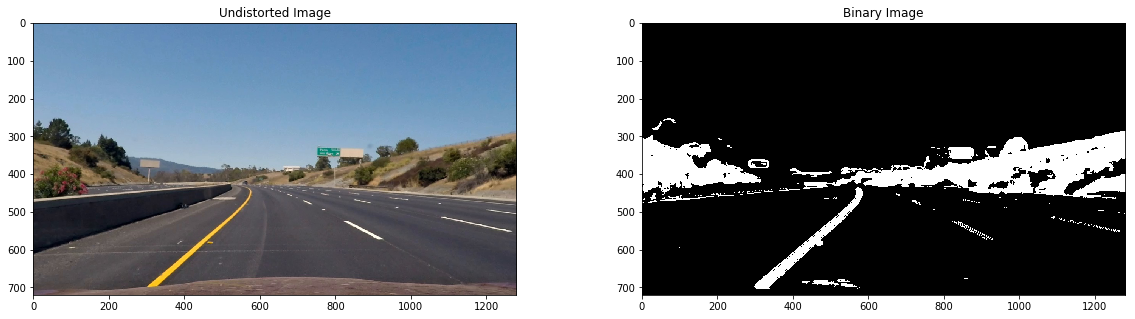

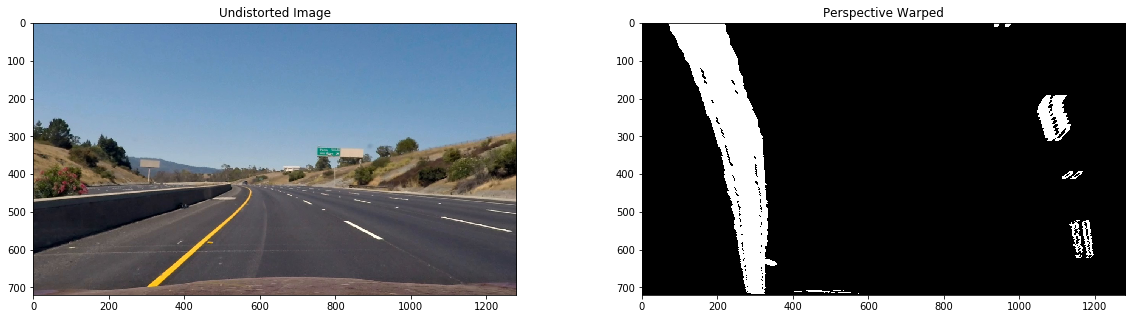

In [8]:
from lane_detection import LaneDetection

img = load_test_image()

lane_algo = LaneDetection()
binary_warped = lane_algo.get_warped_image(img)

undistort_img = lane_algo.undistort_img
binary_img = lane_algo.binary_img

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.imshow(undistort_img)
ax1.set_title('Undistorted Image')
ax2.imshow(binary_img, cmap='gray')
ax2.set_title('Binary Image')


f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.imshow(undistort_img)
ax1.set_title('Undistorted Image')
ax2.imshow(binary_warped, cmap='gray')
ax2.set_title('Perspective Warped')

plt.show()